#### IMPORTAR TODAS LAS LIBRERIAS

In [263]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from scipy.stats import uniform, randint
import pickle  # si quieres guardar modelos
import streamlit as st  # para la parte final de la app

#### CARGAR TODOS LOS DATASET

In [264]:
with open("zoo.names") as f:
    contenido = f.read()

print(contenido)


1. Title: Zoo database

2. Source Information
   -- Creator: Richard Forsyth
   -- Donor: Richard S. Forsyth 
             8 Grosvenor Avenue
             Mapperley Park
             Nottingham NG3 5DX
             0602-621676
   -- Date: 5/15/1990
 
3. Past Usage:
   -- None known other than what is shown in Forsyth's PC/BEAGLE User's Guide.

4. Relevant Information:
   -- A simple database containing 17 Boolean-valued attributes.  The "type"
      attribute appears to be the class attribute.  Here is a breakdown of
      which animals are in which type: (I find it unusual that there are
      2 instances of "frog" and one of "girl"!)

      Class# Set of animals:
      ====== ===============================================================
           1 (41) aardvark, antelope, bear, boar, buffalo, calf,
                  cavy, cheetah, deer, dolphin, elephant,
                  fruitbat, giraffe, girl, goat, gorilla, hamster,
                  hare, leopard, lion, lynx, mink, mole, mo

In [265]:
index = pd.read_csv("Index")

In [266]:
zoo = pd.read_csv("zoo.data", header=None)


In [267]:
zoo

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


Limpieza de columnas y cambios

In [268]:
# Nombres de columnas oficiales del dataset
col_names = [
    "animal_name","hair","feathers","eggs","milk","airborne","aquatic","predator",
    "toothed","backbone","breathes","venomous","fins","legs","tail",
    "domestic","catsize","type"
]

# Cargar el archivo
data_path = "/mnt/data/zoo.data"
zoo = pd.read_csv("zoo.data", header=None, names=col_names)


# Columnas binarias (todas excepto animal_name y legs)
binary_cols = zoo.columns.difference(["animal_name", "legs", "type"])


# Diccionario para decodificar el tipo de animal
type_map = {
    1: "Mammal",
    2: "Bird",
    3: "Reptile",
    4: "Fish",
    5: "Amphibian",
    6: "Bug",
    7: "Invertebrate"
}

zoo["type"] = zoo["type"].replace(type_map)

# Mostrar primeras filas ya legibles
zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,Mammal
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,Mammal
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,Fish
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,Mammal
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,Mammal


### DISTRIBUCIÓN Y PROPORCIÓN DEL TARGET

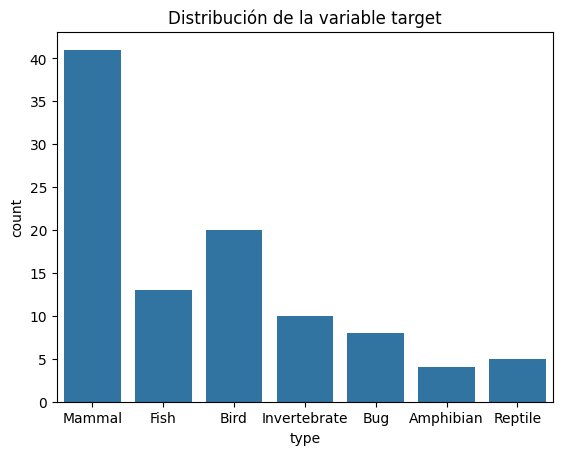

In [269]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='type', data=zoo)
plt.title('Distribución de la variable target')
plt.show()


In [270]:
proportion = zoo['type'].value_counts(normalize=True)
print(proportion)


type
Mammal          0.405941
Bird            0.198020
Fish            0.128713
Invertebrate    0.099010
Bug             0.079208
Reptile         0.049505
Amphibian       0.039604
Name: proportion, dtype: float64


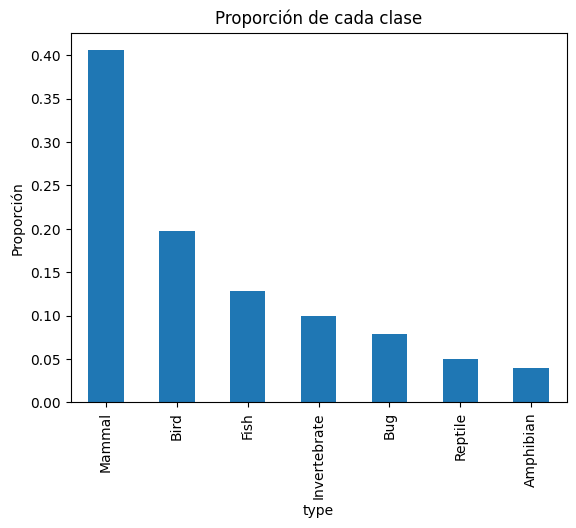

In [271]:
proportion = zoo['type'].value_counts(normalize=True)
proportion.plot(kind='bar')
plt.ylabel('Proporción')
plt.title('Proporción de cada clase')
plt.show()


Conversión de las columnas binarias a _num

In [272]:
features = zoo.columns[1:-1]

for col in features:
    if col == "legs":
        continue  # NO convertir patas, ya son numero

    zoo[col + "_num"] = zoo[col].map({"Sí": 1, "No": 0})


Convierte el nombre de los animales en números enteros únicos

In [273]:
le = LabelEncoder()
zoo['animal_name_num'] = le.fit_transform(zoo['animal_name'])

# Ahora puedes usar 'animal_name_num' como feature en lugar de 'animal_name'


In [274]:
# Eliminar la columna animal_name
zoo = zoo.drop(columns=['animal_name'])


Definir X (features) y Y (target)

In [275]:
# Lista explícita de columnas numéricas que queremos usar como features
# Incluimos la nueva columna 'animal_name_num'
num_features = [col for col in zoo.columns if col.endswith('_num')] + ['legs', 'animal_name_num']

# Seleccionamos solo esas columnas
X = zoo[num_features].copy()

# Convertimos todo a float por seguridad
X = X.apply(pd.to_numeric, errors='coerce')

# Rellenamos NaN si hubiera
X = X.fillna(0)

# Columna objetivo
y = zoo['type']


Agrupar anfibios y reptiles en reptiles_anfibios, y los bichos e invertebrados en invertabrados

In [ ]:
y = y.replace({
    "Amphibian": "Reptiles_Amphibians",
    "Reptile": "Reptiles_Amphibians",
    "Bug": "Invertebrates",
    "Invertebrate": "Invertebrates"
})

Proporción y distribución de las nuevas clases de animales y su nueva proporción

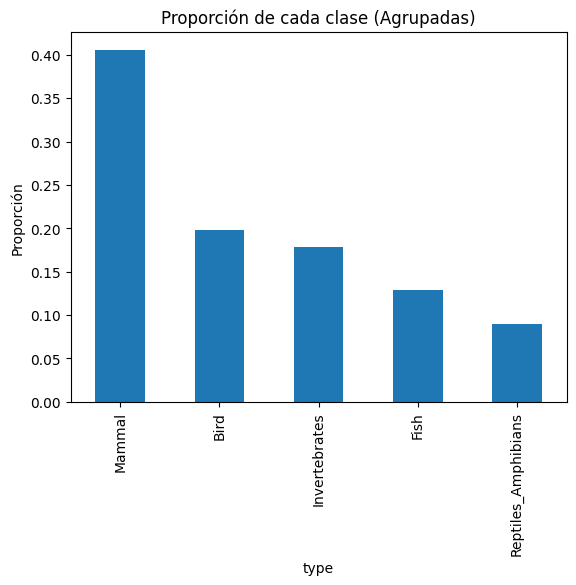

In [306]:
proportion = y.value_counts(normalize=True)

proportion.plot(kind='bar')
plt.ylabel('Proporción')
plt.title('Proporción de cada clase (Agrupadas)')
plt.show()

Recorre todas las columnas en busca de object, excepto type, para eliminarla

In [277]:
cols_to_drop = []
for col in zoo.columns:
    if zoo[col].dtype == object and col != 'type':  # ignoramos la columna objetivo
        cols_to_drop.append(col)

In [278]:
zoo.drop(columns=num_features, inplace=True)

Mi target es categórico, con lo cual lo he convertido en numérico

In [279]:
le = LabelEncoder()
zoo["type_num"] = le.fit_transform(zoo["type"])  # tu columna target original


Correlación entre el target numérico y todas las variables numéricas

In [280]:
corr_target = zoo.corr(numeric_only=True)["type_num"].sort_values(ascending=False)
print(corr_target)


type_num    1.000000
milk        0.711456
hair        0.606299
toothed     0.585993
catsize     0.397822
predator    0.111054
tail        0.102857
backbone    0.092515
domestic    0.048922
fins        0.001322
breathes   -0.003116
venomous   -0.014861
aquatic    -0.229000
airborne   -0.589256
feathers   -0.687023
eggs       -0.726156
Name: type_num, dtype: float64


Correlación entre todas las variables y ellas mismas

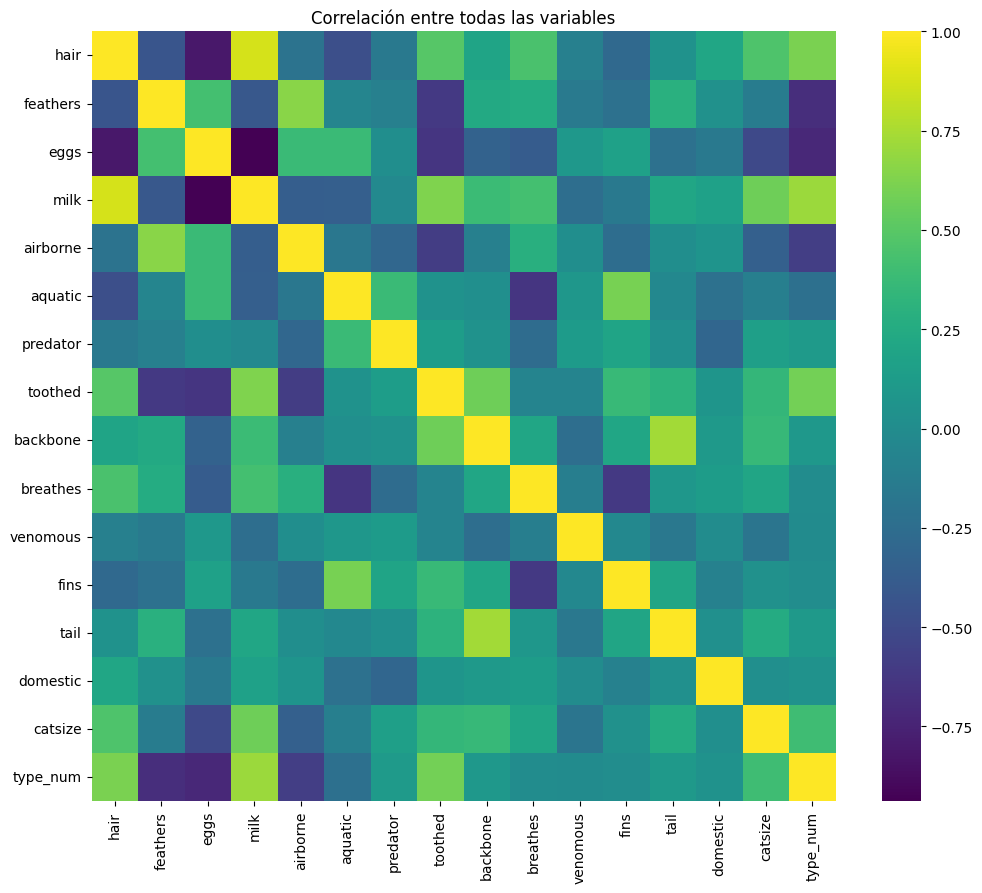

In [281]:
corr_all = zoo.corr(numeric_only=True)
plt.figure(figsize=(12,10))
sns.heatmap(corr_all, annot=False, cmap="viridis")
plt.title("Correlación entre todas las variables")
plt.show()


Entrenar KNN

In [282]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, 
)


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Evaluar KNN

In [283]:
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.3333333333333333
                     precision    recall  f1-score   support

               Bird       0.11      0.50      0.18         2
               Fish       0.00      0.00      0.00         2
      Invertebrates       0.33      0.25      0.29         4
             Mammal       0.56      0.42      0.48        12
Reptiles_Amphibians       0.00      0.00      0.00         1

           accuracy                           0.33        21
          macro avg       0.20      0.23      0.19        21
       weighted avg       0.39      0.33      0.34        21



c:\Users\CeX-Laguna\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\CeX-Laguna\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\CeX-Laguna\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [284]:
y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", acc_knn)


KNN Accuracy: 0.3333333333333333


Entrenar Decision Tree

In [285]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Evaluar Decision Tree

In [286]:
y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", acc_dt)
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.5714285714285714
                     precision    recall  f1-score   support

               Bird       0.33      0.50      0.40         2
               Fish       0.00      0.00      0.00         2
      Invertebrates       0.75      0.75      0.75         4
             Mammal       0.67      0.67      0.67        12
Reptiles_Amphibians       0.00      0.00      0.00         1

           accuracy                           0.57        21
          macro avg       0.35      0.38      0.36        21
       weighted avg       0.56      0.57      0.56        21



c:\Users\CeX-Laguna\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\CeX-Laguna\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\CeX-Laguna\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Random Forest

In [287]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

=== Random Forest ===
Accuracy: 0.5714285714285714
                     precision    recall  f1-score   support

               Bird       0.33      0.50      0.40         2
               Fish       0.00      0.00      0.00         2
      Invertebrates       0.75      0.75      0.75         4
             Mammal       0.67      0.67      0.67        12
Reptiles_Amphibians       0.00      0.00      0.00         1

           accuracy                           0.57        21
          macro avg       0.35      0.38      0.36        21
       weighted avg       0.56      0.57      0.56        21



c:\Users\CeX-Laguna\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\CeX-Laguna\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\CeX-Laguna\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [288]:
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", acc_rf)


Random Forest Accuracy: 0.5714285714285714


Bagging 

In [289]:
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)
bagging.fit(X_train, y_train)
y_pred_bag = bagging.predict(X_test)

print("=== Bagging ===")
print("Accuracy:", accuracy_score(y_test, y_pred_bag))
print(classification_report(y_test, y_pred_bag))

=== Bagging ===
Accuracy: 0.5714285714285714
                     precision    recall  f1-score   support

               Bird       0.33      0.50      0.40         2
               Fish       0.00      0.00      0.00         2
      Invertebrates       0.75      0.75      0.75         4
             Mammal       0.67      0.67      0.67        12
Reptiles_Amphibians       0.00      0.00      0.00         1

           accuracy                           0.57        21
          macro avg       0.35      0.38      0.36        21
       weighted avg       0.56      0.57      0.56        21



c:\Users\CeX-Laguna\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\CeX-Laguna\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\CeX-Laguna\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [290]:
y_pred_bag = bagging.predict(X_test)
acc_bag = accuracy_score(y_test, y_pred_bag)
print("Bagging Accuracy:", acc_bag)


Bagging Accuracy: 0.5714285714285714


Pasting

In [291]:
pasting = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    bootstrap=False,  # sin reemplazo
    random_state=42
)
pasting.fit(X_train, y_train)
y_pred_past = pasting.predict(X_test)

print("=== Pasting ===")
print("Accuracy:", accuracy_score(y_test, y_pred_past))
print(classification_report(y_test, y_pred_past))


=== Pasting ===
Accuracy: 0.5714285714285714
                     precision    recall  f1-score   support

               Bird       0.33      0.50      0.40         2
               Fish       0.00      0.00      0.00         2
      Invertebrates       0.75      0.75      0.75         4
             Mammal       0.67      0.67      0.67        12
Reptiles_Amphibians       0.00      0.00      0.00         1

           accuracy                           0.57        21
          macro avg       0.35      0.38      0.36        21
       weighted avg       0.56      0.57      0.56        21



c:\Users\CeX-Laguna\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\CeX-Laguna\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\CeX-Laguna\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


AdaBoost

In [292]:
ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
acc_ada = accuracy_score(y_test, y_pred_ada)
print("Accuracy:", acc_ada)
print(classification_report(y_test, y_pred_ada))

Accuracy: 0.6190476190476191
                     precision    recall  f1-score   support

               Bird       0.00      0.00      0.00         2
               Fish       0.25      0.50      0.33         2
      Invertebrates       0.75      0.75      0.75         4
             Mammal       0.82      0.75      0.78        12
Reptiles_Amphibians       0.00      0.00      0.00         1

           accuracy                           0.62        21
          macro avg       0.36      0.40      0.37        21
       weighted avg       0.63      0.62      0.62        21



c:\Users\CeX-Laguna\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\CeX-Laguna\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\CeX-Laguna\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Gradient Boosting

In [293]:
gb = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
acc_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy:", acc_gb)
print(classification_report(y_test, y_pred_gb))

Accuracy: 0.6666666666666666
                     precision    recall  f1-score   support

               Bird       0.33      0.50      0.40         2
               Fish       0.50      0.50      0.50         2
      Invertebrates       1.00      0.75      0.86         4
             Mammal       0.69      0.75      0.72        12
Reptiles_Amphibians       0.00      0.00      0.00         1

           accuracy                           0.67        21
          macro avg       0.51      0.50      0.50        21
       weighted avg       0.67      0.67      0.66        21



c:\Users\CeX-Laguna\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\CeX-Laguna\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\CeX-Laguna\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Grind Search - Gradient Boosting

In [294]:
gb = GradientBoostingClassifier(random_state=42)

param_grid_gb = {
    "n_estimators": [50, 100, 150],
    "learning_rate": [0.05, 0.1, 0.2],
    "max_depth": [2, 3, 4]
}

grid_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, scoring='accuracy')
grid_gb.fit(X_train, y_train)

print("Mejores parámetros Gradient Boosting:", grid_gb.best_params_)
print("Mejor accuracy Gradient Boosting:", grid_gb.best_score_)

Mejores parámetros Gradient Boosting: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 150}
Mejor accuracy Gradient Boosting: 0.7625


Random Search - Gradient Boosting

In [295]:
gb = GradientBoostingClassifier(random_state=42)

param_dist_gb = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(2, 5)
}

random_gb = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_dist_gb,
    n_iter=20,      # 20 combinaciones aleatorias
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

random_gb.fit(X_train, y_train)

print("Mejores parámetros Gradient Boosting (Random Search):", random_gb.best_params_)
print("Mejor accuracy Gradient Boosting (Random Search):", random_gb.best_score_)

final_gb_random = random_gb.best_estimator_

Mejores parámetros Gradient Boosting (Random Search): {'learning_rate': np.float64(0.010233629752304298), 'max_depth': 2, 'n_estimators': 107}
Mejor accuracy Gradient Boosting (Random Search): 0.75


Matriz de confusión

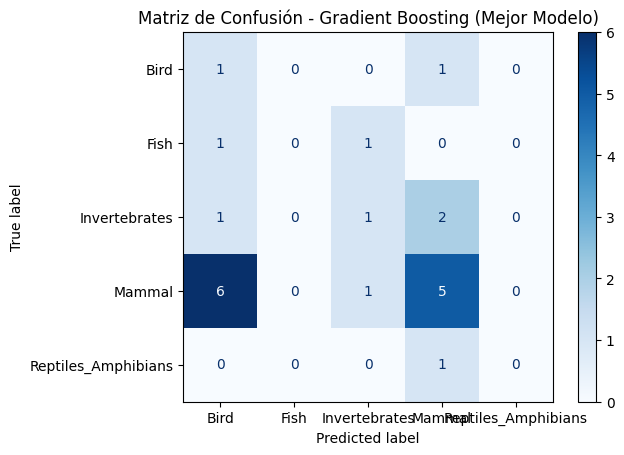

Accuracy total: 0.3333333333333333

Reporte completo por clase:
                     precision    recall  f1-score   support

               Bird       0.11      0.50      0.18         2
               Fish       0.00      0.00      0.00         2
      Invertebrates       0.33      0.25      0.29         4
             Mammal       0.56      0.42      0.48        12
Reptiles_Amphibians       0.00      0.00      0.00         1

           accuracy                           0.33        21
          macro avg       0.20      0.23      0.19        21
       weighted avg       0.39      0.33      0.34        21



c:\Users\CeX-Laguna\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\CeX-Laguna\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\CeX-Laguna\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [296]:
cm = confusion_matrix(y_test, y_pred, labels=best_gb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_gb.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - Gradient Boosting (Mejor Modelo)")
plt.show()

# 8️⃣ Métricas por clase
print("Accuracy total:", accuracy_score(y_test, y_pred))
print("\nReporte completo por clase:")
print(classification_report(y_test, y_pred, target_names=best_gb.classes_))


Regresión Logística

In [297]:
# Crear el modelo
log_reg = LogisticRegression(max_iter=1000)

# Entrenar
log_reg.fit(X_train, y_train)

# Predecir
y_pred_log = log_reg.predict(X_test)

In [298]:
accuracy_log = accuracy_score(y_test, y_pred_log)
print("Accuracy Logistic Regression:", accuracy_log)

print(classification_report(y_test, y_pred_log))

Accuracy Logistic Regression: 0.7142857142857143
                     precision    recall  f1-score   support

               Bird       0.33      0.50      0.40         2
               Fish       0.40      1.00      0.57         2
      Invertebrates       1.00      0.75      0.86         4
             Mammal       0.90      0.75      0.82        12
Reptiles_Amphibians       0.00      0.00      0.00         1

           accuracy                           0.71        21
          macro avg       0.53      0.60      0.53        21
       weighted avg       0.77      0.71      0.72        21



c:\Users\CeX-Laguna\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\CeX-Laguna\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\CeX-Laguna\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Grind Search - Regresión Logística

In [299]:
# Definir el modelo base
log_reg = LogisticRegression(max_iter=1000, random_state=42, multi_class='multinomial')

# Definir los parámetros a probar
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'saga'],  # Solo solvers que soportan multiclass
    'penalty': ['l2']  # l2 es estándar para multiclass con lbfgs/saga
}

# Configurar GridSearch
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Entrenar GridSearch
grid_search.fit(X_train, y_train)

# Resultados
print("Mejores parámetros Logistic Regression:", grid_search.best_params_)
print("Mejor accuracy Logistic Regression:", grid_search.best_score_)

# Modelo final con los mejores parámetros
final_log_reg = grid_search.best_estimator_

c:\Users\CeX-Laguna\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Mejores parámetros Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Mejor accuracy Logistic Regression: 0.5625


Random Search - Regresión Logística

In [300]:
log_reg = LogisticRegression(max_iter=1000, random_state=42, multi_class='multinomial')

param_dist_log = {
    'C': uniform(0.01, 100),       # valores continuos de 0.01 a 100
    'solver': ['lbfgs', 'saga'],
    'penalty': ['l2']
}

random_log = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist_log,
    n_iter=20,      # 20 combinaciones aleatorias
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

random_log.fit(X_train, y_train)

print("Mejores parámetros Logistic Regression (Random Search):", random_log.best_params_)
print("Mejor accuracy Logistic Regression (Random Search):", random_log.best_score_)

final_log_reg_random = random_log.best_estimator_

c:\Users\CeX-Laguna\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Mejores parámetros Logistic Regression (Random Search): {'C': np.float64(37.464011884736244), 'penalty': 'l2', 'solver': 'lbfgs'}
Mejor accuracy Logistic Regression (Random Search): 0.5625


c:\Users\CeX-Laguna\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Comparación Final de todos los modelos

In [301]:
print("\n=== COMPARACIÓN FINAL ===")
print("\n=== COMPARACIÓN FINAL ===")
print(f"KNN:                {acc_knn:.3f}")
print(f"Decision Tree:      {acc_dt:.3f}")
print(f"Random Forest:      {acc_rf:.3f}")
print(f"Bagging:            {acc_bag:.3f}")
print(f"AdaBoost:           {acc_ada:.3f}")
print(f"Gradient Boosting:  {grid_gb.best_score_:.3f} (Grid Search)")
print(f"Logistic Regression:{grid_search.best_score_:.3f} (Grid Search)")




=== COMPARACIÓN FINAL ===

=== COMPARACIÓN FINAL ===
KNN:                0.333
Decision Tree:      0.571
Random Forest:      0.571
Bagging:            0.571
AdaBoost:           0.619
Gradient Boosting:  0.762 (Grid Search)
Logistic Regression:0.562 (Grid Search)


## Selección del mejor modelo

Tras comparar los diferentes clasificadores (KNN, Decision Tree, Random Forest, Bagging, AdaBoost, Gradient Boosting y Logistic Regression), el modelo que obtiene el mejor rendimiento es **Gradient Boosting**, con una accuracy del **76%** (mejor resultado obtenido con Grid Search).

Este modelo también muestra una mayor capacidad de generalización y un mejor equilibrio entre las clases, por lo que se selecciona como **modelo final** del proyecto.



#### Definir el modelo final como Gradient Boosting y entrenar el modelo con todos los datos

In [303]:
final_model = grid_gb.best_estimator_
final_model.fit(X, y)

,loss,'log_loss'
,learning_rate,0.05
,n_estimators,150
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,4
,min_impurity_decrease,0.0
,init,None


#### Ejemplo de predicción usando el modelo final (Regresión Logística)

In [336]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)  # aprende media y desviación de X_train



,copy,True
,with_mean,True
,with_std,True


In [337]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)  # usa el mismo scaler


In [338]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_scaled, y_train)


,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [339]:
grid_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, scoring='accuracy')
grid_gb.fit(X_train_scaled, y_train) 

,estimator,GradientBoost...ndom_state=42)
,param_grid,"{'learning_rate': [0.05, 0.1, ...], 'max_depth': [2, 3, ...], 'n_estimators': [50, 100, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'log_loss'


In [340]:
# 4️⃣ Predicciones en test
y_pred = gb.predict(X_test_scaled)

# 5️⃣ Accuracy total
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy total:", accuracy)

Accuracy total: 0.6666666666666666


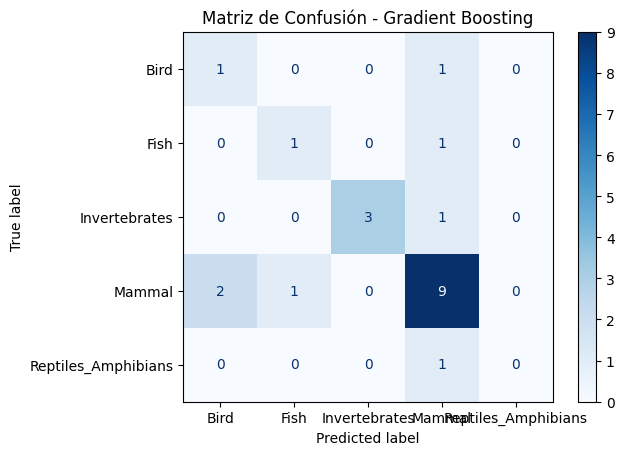

In [341]:
cm = confusion_matrix(y_test, y_pred, labels=gb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gb.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - Gradient Boosting")
plt.show()

In [342]:
gb = GradientBoostingClassifier(random_state=42)

# 4️⃣ Definir la cuadrícula de hiperparámetros
param_grid_gb = {
    "n_estimators": [50, 100, 150],
    "learning_rate": [0.05, 0.1, 0.2],
    "max_depth": [2, 3, 4]
}

# 5️⃣ Crear GridSearchCV
grid_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, scoring='accuracy')

# 6️⃣ Entrenar con GridSearchCV
grid_gb.fit(X_train_scaled, y_train)


,estimator,GradientBoost...ndom_state=42)
,param_grid,"{'learning_rate': [0.05, 0.1, ...], 'max_depth': [2, 3, ...], 'n_estimators': [50, 100, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'log_loss'


In [343]:
best_gb = grid_gb.best_estimator_
print("Mejores parámetros:", grid_gb.best_params_)
print("Mejor accuracy CV:", grid_gb.best_score_)

# 8️⃣ Predicciones en test con el mejor modelo
y_pred = best_gb.predict(X_test_scaled)

Mejores parámetros: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 150}
Mejor accuracy CV: 0.775


In [344]:
nuevo_scaled = scaler.transform(nuevo)  # donde 'nuevo' es tu vector de características
pred = best_gb.predict(nuevo_scaled)


c:\Users\CeX-Laguna\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [345]:
nueva_prueba = [[1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 4, 0, 0]]

# Escalar el vector con el scaler que usamos en entrenamiento
nuevo_scaled = scaler.transform(nueva_prueba)

# Predecir usando el mejor modelo entrenado
pred = best_gb.predict(nuevo_scaled)
print("Predicción tipo de animal:", pred[0])

Predicción tipo de animal: Fish


c:\Users\CeX-Laguna\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Mejores parámetros: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 150}
Mejor accuracy CV: 0.775
Accuracy total: 0.6190476190476191

Reporte completo por clase:
                     precision    recall  f1-score   support

               Bird       0.33      0.50      0.40         2
               Fish       0.00      0.00      0.00         2
      Invertebrates       1.00      0.75      0.86         4
             Mammal       0.64      0.75      0.69        12
Reptiles_Amphibians       0.00      0.00      0.00         1

           accuracy                           0.62        21
          macro avg       0.40      0.40      0.39        21
       weighted avg       0.59      0.62      0.60        21



c:\Users\CeX-Laguna\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\CeX-Laguna\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\CeX-Laguna\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


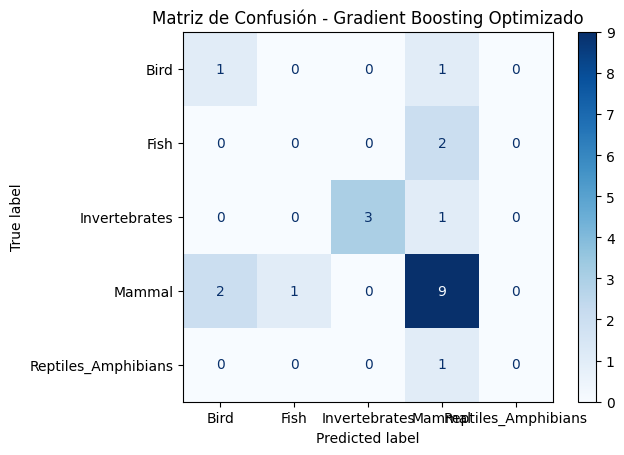

Predicción tipo de animal: Fish


c:\Users\CeX-Laguna\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [346]:
# 1️⃣ Librerías
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 2️⃣ Codificar el target
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)  # usar el mismo encoder

# 3️⃣ Escalar las features (opcional para Gradient Boosting)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4️⃣ Modelo base
gb = GradientBoostingClassifier(random_state=42)

# 5️⃣ GridSearchCV
param_grid_gb = {
    "n_estimators": [50, 100, 150],
    "learning_rate": [0.05, 0.1, 0.2],
    "max_depth": [2, 3, 4]
}

grid_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, scoring='accuracy')
grid_gb.fit(X_train_scaled, y_train_enc)

# 6️⃣ Mejor modelo entrenado
best_gb = grid_gb.best_estimator_
print("Mejores parámetros:", grid_gb.best_params_)
print("Mejor accuracy CV:", grid_gb.best_score_)

# 7️⃣ Predicciones en test
y_pred_enc = best_gb.predict(X_test_scaled)
y_pred = le.inverse_transform(y_pred_enc)

# 8️⃣ Accuracy y reporte
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy total:", accuracy)
print("\nReporte completo por clase:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# 9️⃣ Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=le.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - Gradient Boosting Optimizado")
plt.show()

# 🔟 Predicción de un nuevo mamífero
nuevo_mamifero = [[1,0,0,1,0,0,1,1,1,1,0,0,1,0,1,4,0,0]]  # vector con mismas columnas que X_train
nuevo_scaled = scaler.transform(nuevo_mamifero)
pred_nuevo_enc = best_gb.predict(nuevo_scaled)
pred_nuevo = le.inverse_transform(pred_nuevo_enc)
print("Predicción tipo de animal:", pred_nuevo[0])


In [348]:
nuevo_scaled = scaler.transform(nuevo)
pred = final_model.predict(nuevo_scaled)


c:\Users\CeX-Laguna\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\CeX-Laguna\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [353]:
nueva_prueba = [[0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0]]  # características de un pez

# Escalar el vector si usaste scaler en entrenamiento
nuevo_scaled = scaler.transform(nueva_prueba)

# Predecir usando el mejor modelo optimizado
pred_enc = best_gb.predict(nuevo_scaled)
pred_clase = le.inverse_transform(pred_enc)
print("Predicción tipo de animal:", pred_clase[0])

Predicción tipo de animal: Fish


c:\Users\CeX-Laguna\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [349]:
nuevo = [[1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 4, 0, 5]]  # ejemplo con las mismas columnas que X
pred = final_model.predict(nuevo)
print("Predicción tipo de animal:", pred[0])

Predicción tipo de animal: Fish


c:\Users\CeX-Laguna\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [350]:
nuevo_mamifero = [[1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 4, 0, 0]]
pred = final_model.predict(nuevo_mamifero)
print("Predicción tipo de animal:", pred[0])


Predicción tipo de animal: Fish


c:\Users\CeX-Laguna\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [351]:
nuevo2 = [[0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 1, 3]]

pred2 = final_model.predict(nuevo2)
print("Predicción tipo de animal:", pred2[0])


Predicción tipo de animal: Fish


c:\Users\CeX-Laguna\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [304]:
zoo.to_csv("zoo_final.csv", index=False)

In [305]:
import joblib

# Suponiendo que este es tu modelo final
final_model = grid_gb.best_estimator_

# Entrenas con todos los datos
final_model.fit(X, y)

# Guardas el modelo
joblib.dump(final_model, "modelo_final.pkl")

print("Modelo guardado correctamente")


Modelo guardado correctamente
